<a href="https://colab.research.google.com/github/Bikash0003/Comm-Bank/blob/main/Homeloan_comm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Step 1: Load the Excel file and skip intro rows
df = pd.read_excel("Home_loan.xlsx", skiprows=6)
df

,Borrower ID Number,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Age of Borrower,Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
0,1,53,29.57,91700,123000,1.3413,2,< 25,10,385000,195000,50.65,360,2.75
1,2,6,90.76,83300,250000,3.0012,2,< 25,30,535000,505000,95.00,360,3.50
2,3,34,64.19,96500,64000,0.6632,2,< 25,43,375000,105000,28.55,180,2.50
3,4,51,34.58,124900,141000,1.1289,2,< 25,46,665000,345000,51.51,180,2.25
4,5,39,17.93,84600,109000,1.2884,1,< 25,30,405000,325000,80.00,180,2.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,37,40.28,80100,275000,3.4332,2,> 74,20,755000,505000,90.00,360,2.62
496,497,8,14.48,100000,79000,0.7900,2,> 74,20,425000,315000,73.85,360,3.00
497,498,17,10.96,69300,187000,2.6984,2,> 74,10,325000,145000,43.75,180,2.87
498,499,26,33.82,79700,109000,1.3676,2,> 74,20,525000,385000,73.46,360,3.62


In [3]:
# Step 2: Drop completely empty columns
df.dropna(axis=1, how='all', inplace=True)

# Step 3: Rename columns for easier readability
df.rename(columns={
    'Borrower ID Number': 'ID_Number',
    'Wide Area Location Code': 'Location_Code',
    '% Minority in Local Area': 'Minority_Percent',
    'Median Family Income in Local Area': 'Local_Median_Income',
    'Borrower Annual Income': 'Borrower_Income',
    'Borrower Income Ratio': 'Income_Ratio',
    'First Time Buyer? (1=Yes, 2=No)': 'First_Time_Buyer',
    'Age of Borrower': 'Age',
    'Borrower Debt to Income Ratio': 'DTI',
    'Appraised Value of Home': 'Home_Value',
    'Amount Borrowed': 'Loan_Amount',
    'LTV Ratio': 'LTV',
    'Length of Mortgage in Months': 'Loan_Term_Months',
    'Mortgage Interest Rate': 'Interest_Rate'
}, inplace=True)
df.head()


,ID_Number,Location_Code,Minority_Percent,Local_Median_Income,Borrower_Income,Income_Ratio,First_Time_Buyer,Age,DTI,Home_Value,Loan_Amount,LTV,Loan_Term_Months,Interest_Rate
0,1,53,29.57,91700,123000,1.3413,2,< 25,10,385000,195000,50.65,360,2.75
1,2,6,90.76,83300,250000,3.0012,2,< 25,30,535000,505000,95.00,360,3.50
2,3,34,64.19,96500,64000,0.6632,2,< 25,43,375000,105000,28.55,180,2.50
3,4,51,34.58,124900,141000,1.1289,2,< 25,46,665000,345000,51.51,180,2.25
4,5,39,17.93,84600,109000,1.2884,1,< 25,30,405000,325000,80.00,180,2.87


In [6]:
filtered_df_by_DTI = df[
    (df['DTI'] < 40)]
filtered_df_by_DTI ["Age"].value_counts()

,count
Age,
35 to 44,100
45 to 54,64
55 to 64,62
65 to 74,40
25 to 34,37
< 25,34
> 74,10


In [9]:
filtered_df_by_DTI.info()


<class 'pandas.core.frame.DataFrame'>
Index: 347 entries, 0 to 498
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID_Number            347 non-null    int64  
 1   Location_Code        347 non-null    int64  
 2   Minority_Percent     347 non-null    float64
 3   Local_Median_Income  347 non-null    int64  
 4   Borrower_Income      347 non-null    int64  
 5   Income_Ratio         347 non-null    float64
 6   First_Time_Buyer     347 non-null    int64  
 7   Age                  347 non-null    object 
 8   DTI                  347 non-null    int64  
 9   Home_Value           347 non-null    int64  
 10  Loan_Amount          347 non-null    int64  
 11  LTV                  347 non-null    float64
 12  Loan_Term_Months     347 non-null    int64  
 13  Interest_Rate        347 non-null    float64
dtypes: float64(4), int64(9), object(1)
memory usage: 40.7+ KB


In [13]:
# Step: Filter out rows where Age is '> 74' or '65-74'
df_filtered_values_by_DTI_AGE = filtered_df_by_DTI[~filtered_df_by_DTI['Age'].isin(['> 74', '65 to 74'])]
df_filtered_values_by_DTI_AGE

,ID_Number,Location_Code,Minority_Percent,Local_Median_Income,Borrower_Income,Income_Ratio,First_Time_Buyer,Age,DTI,Home_Value,Loan_Amount,LTV,Loan_Term_Months,Interest_Rate
0,1,53,29.57,91700,123000,1.3413,2,< 25,10,385000,195000,50.65,360,2.75
1,2,6,90.76,83300,250000,3.0012,2,< 25,30,535000,505000,95.00,360,3.50
4,5,39,17.93,84600,109000,1.2884,1,< 25,30,405000,325000,80.00,180,2.87
5,6,24,29.18,124900,255000,2.0416,2,< 25,20,905000,645000,71.44,360,2.86
6,7,8,81.63,100000,145000,1.4500,1,< 25,30,475000,395000,85.00,180,2.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,415,18,7.09,89100,64000,0.7183,1,55 to 64,30,165000,105000,75.86,360,3.50
415,416,8,8.70,100000,194000,1.9400,2,55 to 64,36,745000,575000,90.00,360,3.37
416,417,13,7.02,82200,137000,1.6667,2,55 to 64,30,545000,405000,75.00,360,3.25
417,418,47,16.72,72600,52000,0.7163,2,55 to 64,30,115000,95000,90.00,360,4.50


In [14]:
df_filtered_values_by_DTI_AGE.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 419
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID_Number            297 non-null    int64  
 1   Location_Code        297 non-null    int64  
 2   Minority_Percent     297 non-null    float64
 3   Local_Median_Income  297 non-null    int64  
 4   Borrower_Income      297 non-null    int64  
 5   Income_Ratio         297 non-null    float64
 6   First_Time_Buyer     297 non-null    int64  
 7   Age                  297 non-null    object 
 8   DTI                  297 non-null    int64  
 9   Home_Value           297 non-null    int64  
 10  Loan_Amount          297 non-null    int64  
 11  LTV                  297 non-null    float64
 12  Loan_Term_Months     297 non-null    int64  
 13  Interest_Rate        297 non-null    float64
dtypes: float64(4), int64(9), object(1)
memory usage: 34.8+ KB


In [15]:
df_filtered_values_by_DTI_AGE


,ID_Number,Location_Code,Minority_Percent,Local_Median_Income,Borrower_Income,Income_Ratio,First_Time_Buyer,Age,DTI,Home_Value,Loan_Amount,LTV,Loan_Term_Months,Interest_Rate
0,1,53,29.57,91700,123000,1.3413,2,< 25,10,385000,195000,50.65,360,2.75
1,2,6,90.76,83300,250000,3.0012,2,< 25,30,535000,505000,95.00,360,3.50
4,5,39,17.93,84600,109000,1.2884,1,< 25,30,405000,325000,80.00,180,2.87
5,6,24,29.18,124900,255000,2.0416,2,< 25,20,905000,645000,71.44,360,2.86
6,7,8,81.63,100000,145000,1.4500,1,< 25,30,475000,395000,85.00,180,2.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,415,18,7.09,89100,64000,0.7183,1,55 to 64,30,165000,105000,75.86,360,3.50
415,416,8,8.70,100000,194000,1.9400,2,55 to 64,36,745000,575000,90.00,360,3.37
416,417,13,7.02,82200,137000,1.6667,2,55 to 64,30,545000,405000,75.00,360,3.25
417,418,47,16.72,72600,52000,0.7163,2,55 to 64,30,115000,95000,90.00,360,4.50


In [17]:
df_filtered_values_by_DTI_AGE.to_excel("Qualified_Borrowers_Output_DTI.xlsx", index=False)


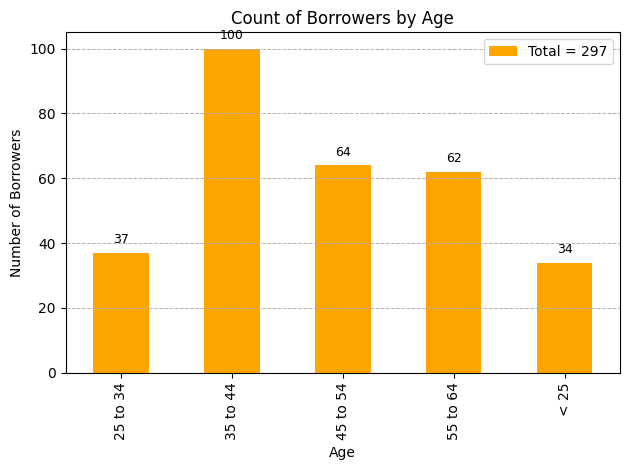

In [23]:
import matplotlib.pyplot as plt

# Get age counts sorted
age_counts = df_filtered_values_by_DTI_AGE['Age'].value_counts().sort_index()

# Plot
ax = age_counts.plot(kind='bar', color='orange')

# Titles and labels
plt.title('Count of Borrowers by Age')
plt.xlabel('Age')
plt.ylabel('Number of Borrowers')

# Add value labels on top of each bar
for i, v in enumerate(age_counts):
    plt.text(i, v + 2, str(v), ha='center', va='bottom', fontsize=9)

# Add dashed gridlines on Y-axis
ax.yaxis.grid(True, linestyle='--', linewidth=0.7)

# Add legend with total
total = age_counts.sum()
ax.legend([f'Total = {total}'], loc='upper right')

# Show plot
plt.tight_layout()
plt.show()
